In [1]:
import numpy as np
import pandas as pd
#import fiona 
#import math
#import xarray as xa
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#import datetime
#import random
#from scipy.interpolate import interp1d
import geopandas as gpd

In [2]:
gdb_path = 'c:/Users/markstro/work1.1/GIS/GFv1.1_v2e.gdb'
hrus_v10_path = 'c:/Users/markstro/work/GIS/hrusAllConus/hrusAllConus.shp'
farns_v10_path = 'c:/Users/markstro/work/farnsworth/'

In [3]:
# Read the version 1.0 shapefile
hrus_v10 = gpd.read_file(hrus_v10_path)

In [4]:
coolwarm = cm.get_cmap('coolwarm', 12)
print(coolwarm)

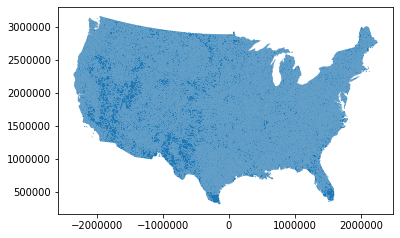

In [5]:
hrus_v10.plot()

In [6]:
print(hrus_v10.shape)

(109555, 6)


In [7]:
hrus_v10.head()

,hru_id_loc,region,Shape_Leng,Shape_Area,nhm_id,geometry
0,1,r01,27679.398793,9.999432e+06,1,"POLYGON ((1866649.356 2233274.866, 1866614.954..."
1,2,r01,20181.458616,1.104901e+07,2,"POLYGON ((1864274.703 2238165.084, 1864395.138..."
2,3,r01,7234.718196,1.970528e+06,3,"POLYGON ((1862379.894 2236306.094, 1862354.911..."
3,4,r01,2177.637490,1.625316e+05,4,"POLYGON ((1862712.015 2238821.736, 1862655.213..."
4,5,r01,6678.093684,1.790298e+06,5,"MULTIPOLYGON (((1873936.012 2238315.927, 18739..."


In [8]:
shape_nhm_id = hrus_v10["nhm_id"].values
print(shape_nhm_id)
print(len(shape_nhm_id))
print(min(shape_nhm_id), max(shape_nhm_id))

[     1      2      3 ... 109949 109950 109951]
109555
1 109951


In [9]:
# Read the Farnsworth PET data for version 1.0
# Units of values in these files is mm/month

fns = ["farnsPET_r01.csv", "farnsPET_r02.csv", "farnsPET_r03.csv", "farnsPET_r04.csv", "farnsPET_r05.csv",
       "farnsPET_r06.csv", "farnsPET_r07.csv", "farnsPET_r08.csv", "farnsPET_r09.csv", "farnsPET_r10L.csv", 
       "farnsPET_r10U.csv", "farnsPET_r11.csv", "farnsPET_r12.csv", "farnsPET_r13.csv", "farnsPET_r14.csv", 
       "farnsPET_r15.csv", "farnsPET_r16.csv", "farnsPET_r17.csv", "farnsPET_r18.csv"]

farns = np.zeros(12 * 109951)
farns.shape = (109951, 12)

count = 0
for ii in range(len(fns)):
    farns_v10_df = pd.read_csv(filepath_or_buffer=farns_v10_path + fns[ii])
    foo = farns_v10_df.values
    nloc_hru = len(farns_v10_df.columns) - 1
    
    for jj in range(12):
        for kk in range(nloc_hru):
            ll = kk + count
            farns[ll,jj] = foo[jj,kk+1]
            
    count += nloc_hru
#    farns_v10_df['index'] = farns_v10_df['index'].apply(np.int)

print(count)

109951


In [10]:
# do the mapping
# there are 109951 HRUs in v1.0

nfeat = len(shape_nhm_id)

# imon goes from 0 to 11
imon = 6

pet = np.zeros(nfeat)
for ii in range(nfeat):
    ihru = shape_nhm_id[ii]-1
#    print("feature ", ii, " has hru_id ", ihru, " month ", imon, " value is ", farns[ihru,imon])
    pet[ii] = farns[ihru,imon]


In [11]:
hrus_v10["pet"] = pet
hrus_v10.head()

,hru_id_loc,region,Shape_Leng,Shape_Area,nhm_id,geometry,pet
0,1,r01,27679.398793,9.999432e+06,1,"POLYGON ((1866649.356 2233274.866, 1866614.954...",121.8
1,2,r01,20181.458616,1.104901e+07,2,"POLYGON ((1864274.703 2238165.084, 1864395.138...",121.8
2,3,r01,7234.718196,1.970528e+06,3,"POLYGON ((1862379.894 2236306.094, 1862354.911...",121.8
3,4,r01,2177.637490,1.625316e+05,4,"POLYGON ((1862712.015 2238821.736, 1862655.213...",121.8
4,5,r01,6678.093684,1.790298e+06,5,"MULTIPOLYGON (((1873936.012 2238315.927, 18739...",121.8


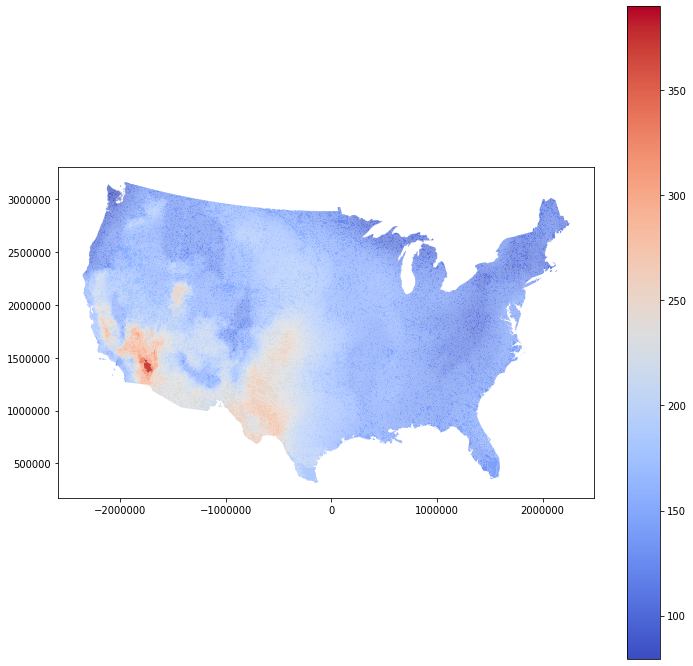

In [12]:
# plot all HRUs in white (background color)
f, ax = plt.subplots(1, figsize=(12, 12))
#hrus.plot(color="white", ax=ax)

# df.dropna(thresh=2)

# plot the HRUs with valid temperature (non-nan) with their color ramp colors
hrus_v10.plot(column="pet", cmap='coolwarm', ax=ax, legend=True)

In [13]:
print(farns)
print(farns.shape)

[[ 7.4      18.4      43.7      ... 55.1      26.8      10.3     ]
 [ 7.4      18.4      43.7      ... 55.1      26.8      10.3     ]
 [ 7.4      18.4      43.7      ... 55.1      26.8      10.3     ]
 ...
 [13.5      24.3      54.2      ... 80.2      43.2      20.2     ]
 [18.755592 27.184475 52.919773 ... 76.164696 44.31015  24.865221]
 [15.243183 24.335669 50.795643 ... 74.77354  41.872246 21.527727]]
(109951, 12)


In [14]:
# Create the pandas DataFrame with the farnsworth pet values. This is for writing a csv file.
pet_df = pd.DataFrame(farns, columns = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
pet_df["hruid_v10"] = range(1, 109951 + 1)

# This moves the "dates" column to the first position, better for the CSV.
cols = list(pet_df.columns)
cols = [cols[-1]] + cols[:-1]
pet_df = pet_df[cols]

pet_df.head()

pet_df.to_csv(path_or_buf=farns_v10_path + "farns_gf_1_0_mm_per_month.csv")